# Neural Network Digits Classifier 

In this notebook we will be building a neural network classifier from the UCI Optical Recognition of Handwritten Digits data set from the UCI Machine Learning Repository. The goal is to produce a model that can maximize classification accurately while minimizing memory and computation requirements. To do so, we will explore how the number of hidden layers and respective number of neurons weighs in on model accuracy. We will be using the Scikit Learn library to both import the models and dataset. The full dataset can be found in the [UCI Machine Learning Reposity](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

## Handwritting Digits Dataset

The UCI MLR Handwritten Digits Dataset contains 1797 normalized bitmaps of handwritten digits from 43 participants. Each observation has 64 attributes which can be rearranged into 8x8 matricies in which each element is an integer in the range of 0 to 16. 

In [1]:
from IPython.display import Markdown as md

#### Importing the Libraries

In [2]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
# Creating a df with the input data
df = pd.DataFrame(load_digits()['data'])

#### Visualization of the Data

In [4]:
first_image = df.iloc[0]
np_image = first_image.values.reshape(8,8)

Each entry has 64 attributes, and can be imaged by reshaping into the 8x8 matrix

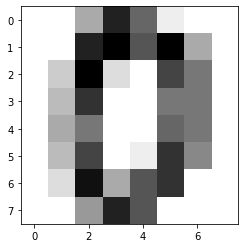

In [5]:
# Mapping a single character
plt.imshow(np_image, cmap='gray_r')
plt.show()

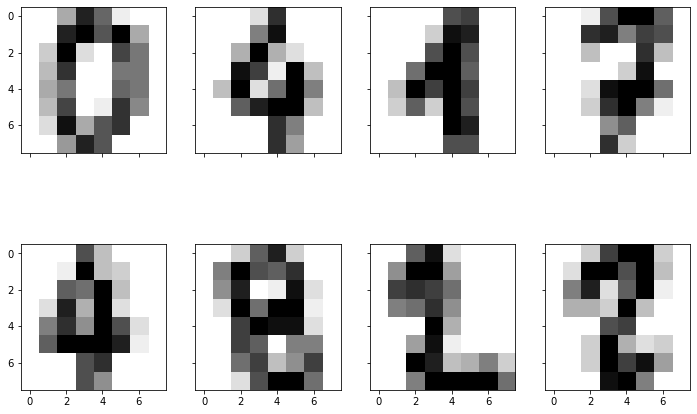

In [6]:
# Plotting several numbers of the dataset 
fig, axes = plt.subplots(2, 4, sharex=True, sharey=True, figsize=(12,8))
image_index = 0
for i in range(0, 2):
    for j in range(0, 4):
        axes[i, j].imshow(df.iloc[image_index].values.reshape(8,8), cmap='gray_r')
        image_index += 100
plt.show()

### Preparing the Data for Classification

#### Splitting the Data into Dependant and Idependant Sets

In [7]:
# Creating a df containging the data of the images
X = pd.DataFrame(load_digits()['data'])
y = load_digits()['target']

## K Nearest Neighbor Classifier

A K Nearest Neighbor (K-nn) Classifier can be used to classifiy the digits based on the proximity of the input data to other input data of the same type. This model can be used as a baseline model in order to test our more advanced nerual network model later in the notebook.

#### Splitting the data into a test set and training set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#### Training the classifier on the training set data

In [9]:
# Kreating our K-nn classifier using n=5
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

#### Predicting test set data

In [10]:
# Predicting Test set results using our K-nn classifier
y_pred = classifier.predict(X_test)

#### Testing the model using a 4-Fold Cross Validation

In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [12]:
cv = KFold(n_splits=4)
scores = cross_val_score(classifier, X_test, y_test, scoring='accuracy', cv=cv)

In [13]:
print(f'Accuracy: {np.mean(scores)}')

Accuracy: 0.9638888888888889


The K-nn classifier works with reasonable accuracy, however it has a few downsides. K-nn models have high memory and computational requirements. For each new observation, many comparisons need to be made. While this may work on smaller datasets with minimal downsides, as the dataset grows, each new observation requires exponential levels of computation. Additionally, there is no model representation to debug, explore, and fine tune.  

# Neural Network Classifier

We will be using MLPClassifier from the Scikit Learn neural network library to create a classifier with varying neurons and hidden layers. By varying the number of neurons and hidden layers, we can explore how these affect the accuracy and performance of the model. The ultimate goal is to produce a model that maximises accuracy of test set predicions with minimal computation and memory usage. 

#### Importing the Libraries

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np

#### Loading the Data

In [15]:
# Creating a df containging the data of the images
X = pd.DataFrame(load_digits()['data'])
y = load_digits()['target']

#### Initializing the Number of folds in our K-Fold Cross Validation

In [16]:
cv = KFold(n_splits=4)

#### Splitting the data into test set and training set

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#### Creating afunciton to create and evaluate a nerual classifier

In [18]:
def neural_classifier(X_train, X_test, y_train, y_test, neurons:(int,), cv, max_iter:int = 2000) -> (float, float):
    """
    Creates a nueral network classifier using sklearn.MLPClassifier and performs a K-Fold cross validation on the testing and training set
    :param neurons: Tuple of neurons in each hidden layer
    :param cv: Cross validator object
    :param max_iter: Maximum number of iterations for the MLP Classifier to converge. Default = 2000.
    :return: Test set cross validation score, Training set cross validation score.
    """
    n_classifier = MLPClassifier(hidden_layer_sizes=neurons, solver='adam', max_iter=max_iter, random_state=1)
    n_classifier.fit(X_train, y_train)
    test_scores = cross_val_score(n_classifier, X_test, y_test, scoring='accuracy', cv=cv)
    train_scores = cross_val_score(n_classifier, X_train, y_train, scoring='accuracy', cv=cv)
    return (np.mean(test_scores), np.mean(train_scores))

### Single Hidden Layer Model

Evaluating a Single Hidden Layer Classifier. We will be testing how the model performs on both the test set data and the training set data. A model that performs well on the training set and not the test set overfit the data 

In [19]:
import time

In [20]:
# Numbers of neurons to test
n_neurons = [8, 16, 32, 64, 128, 256]

In [21]:
# Testing our model using n_neurons for each iteration with a single hidden layer
single_layer_test = [] # List for Storing Test Set scores
single_layer_train = [] # List for storing training set scores
start = time.perf_counter()
for neuron in n_neurons:
    _test, _train = neural_classifier(X_train, X_test, y_train, y_test, neuron, cv)
    single_layer_test.append(_test)
    single_layer_train.append(_train)
end = time.perf_counter()

C:\Users\Hvntr\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
# Identifying the best performing set
single_layer_best = np.max(single_layer_test)
single_layer_best_neurons = n_neurons[single_layer_test.index(np.max(single_layer_test))]
single_layer_time = end - start

In [23]:
print("""The classifier with a single hidden layer had a maximum accuracy of {:.4f} with {} neurons. 
These computations took {:.2f} seconds.""".format(
    single_layer_best,
    single_layer_best_neurons, 
    single_layer_time))

The classifier with a single hidden layer had a maximum accuracy of 0.9444 with 256 neurons. 
These computations took 52.37 seconds.


#### Visualizing the Effect of Number of Neurons in one Hidden Layer

In [24]:
import matplotlib.pyplot as plt

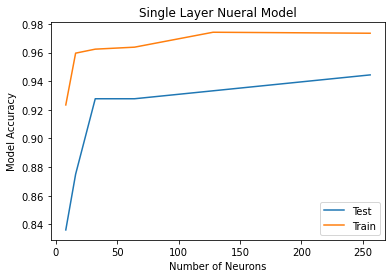

In [25]:
plt.plot(n_neurons, single_layer_test, label='Test')
plt.plot(n_neurons, single_layer_train, label='Train')
plt.xlabel('Number of Neurons')
plt.ylabel('Model Accuracy')
plt.title('Single Layer Nueral Model')
plt.legend()
plt.show()

### Two Hidden Layers

In [26]:
n_neurons = [8, 16, 32, 64, 128, 256]

In [27]:
# Testing our model using n_neurons for each iteration with two hidden layers
two_layer_test = [] # List for Storing Test Set scores
two_layer_train = [] # List for storing training set scores
neuron_xprod = [] # List for storing the combination of number of neurons in each hidden layer
start = time.perf_counter()
for neuron_a in n_neurons:
    for neuron_b in n_neurons:
        _test, _train = neural_classifier(X_train, X_test, y_test, y_train, (neuron_a, neuron_b), cv)
        two_layer_test.append(_test)
        two_layer_train.append(_train)
        neuron_xprod.append((neuron_a, neuron_b))
end = time.perf_counter()

ValueError: Found input variables with inconsistent numbers of samples: [1437, 360]

In [ ]:
# Identifying the best performing set
two_layer_best = np.max(two_layer_test)
two_layer_best_neurons = neuron_xprod[two_layer_test.index(np.max(two_layer_test))]
two_layer_time = end - start

In [ ]:
print("""The classifier with a single hidden layer had a maximum cross val score of {:.4f} with {} neurons. 
These computations took {:.2f} seconds.""".format(
    two_layer_best,
    two_layer_best_neurons, 
    two_layer_time))

In [ ]:
plt.plot(two_layer_test, label='Test')
plt.plot(two_layer_train, label='Train')
plt.title('Two Hidden Layer Model Accuracy')
plt.legend()
plt.show()

In [ ]:
from IPython.display import Markdown as md

In [ ]:
md(f'The Neural Network with two hidden layers performed slightly better than a single layer nueral network. The two hidden layer classifier had a maximum accuracy of {two_layer_best:.4f} using {two_layer_best_neurons} neurons on the respective layers. The two layer model overfit the data less than the single hiden layer model. The total computation time for the iterations of neurons took {two_layer_time:.2f} seconds.')

#### Evaluation of Two Hidden Layers

Two hidden layers dramatically increased the accuracy of our model. However, there was a diminishing return on the increase in performance with the number of neurons. The training set begins to asymptote on 0.98, and it is unlikely that adding further neurons would increase performance of the model substatially.  Computation time of increasing neurons would rise exponentially with little result. Accuracy of the model also dips when one of the hidden layers has substantially less neurons than the other, suggesting that the accuracy is a function of the product of the number of neurons in each layer, rather than the sum. 

## Further increasing the number of hidden layers

We will use the `neural_classifier` function to ramp up our model to several more hidden layers and varying neurons on each layer to see how they perform. The goal of this is to see how the number of layers and neurons affects the overall accuracy of the model on predicting test set data and how this affects the overfitting. Additionally, we will test if the number of folds affects how our model fits the test set data.

### Three Hidden Layers

In [ ]:
cv = KFold(n_splits=4)
three_layer_4fold = [] # Initializing the 4 fold list

#### 4-Fold Cross Validation Model Testing

In [ ]:
three_layer_4fold.append(neural_classifier(X_train, X_test, y_train, y_test, (8,)*3, cv))

In [ ]:
three_layer_4fold.append(neural_classifier(X_train, X_test, y_train, y_test, (64,)*3, cv))

In [ ]:
three_layer_4fold.append(neural_classifier(X_train, X_test, y_train, y_test, (128,)*3, cv))

In [ ]:
three_layer_4fold.append(neural_classifier(X_train, X_test, y_train, y_test, (256,)*3, cv))

#### 10-Fold Cross Validation Model Testing

In [ ]:
cv = KFold(n_splits=10) # increasing the number of folds in our K-fold 
three_layer_10fold = [] # Initializing the 10 fold list

In [ ]:
three_layer_10fold.append(neural_classifier(X_train, X_test, y_train, y_test, (8,)*3, cv))

In [ ]:
three_layer_10fold.append(neural_classifier(X_train, X_test, y_train, y_test, (64,)*3, cv))

In [ ]:
three_layer_10fold.append(neural_classifier(X_train, X_test, y_train, y_test, (128,)*3, cv))

In [ ]:
three_layer_10fold.append(neural_classifier(X_train, X_test, y_train, y_test, (256,)*3, cv))

#### Plotting and Visualizing the Data

In [ ]:
test = [three_layer_4fold[x][0] for x in range(0, len(three_layer_4fold))]
train = [three_layer_4fold[x][1] for x in range(0, len(three_layer_4fold))]

In [ ]:
np.max(test)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test, label='Test')
plt.plot(train, label='Train')
plt.legend()
plt.title('Three Hidden Layers - 4 Fold Cross Validation')
plt.show()

In [ ]:
test = [three_layer_10fold[x][0] for x in range(0, len(three_layer_10fold))]
train = [three_layer_10fold[x][1] for x in range(0, len(three_layer_10fold))]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test, label='Test')
plt.plot(train, label='Train')
plt.legend()
plt.title('Three Hidden Layers - 10 Fold Cross Validation')
plt.show()

### Four Hidden Layers

#### 4-Fold Cross Valitaion Model Testing

In [ ]:
cv = KFold(n_splits=4)
four_layer_4fold = []

In [ ]:
four_layer_4fold.append(neural_classifier(X_train, X_test, y_train, y_test, (8,)*4, cv))

In [ ]:
four_layer_4fold.append(neural_classifier(X_train, X_test, y_train, y_test, (16,)*4, cv))

In [ ]:
four_layer_4fold.append(neural_classifier(X_train, X_test, y_train, y_test, (64,)*4, cv))

In [ ]:
four_layer_4fold.append(neural_classifier(X_train, X_test, y_train, y_test, (128,)*4, cv))

In [ ]:
four_layer_4fold.append(neural_classifier(X_train, X_test, y_train, y_test, (256,)*4, cv))

Four hidden layers did little to increase accuracy, and began to overfit the training set as the number of neurons increased.

#### 10-Fold Cross Validation Model Testing

In [ ]:
cv = KFold(n_splits=10)
four_layer_10fold = []

In [ ]:
four_layer_10fold.append(neural_classifier(X_train, X_test, y_train, y_test, (8,)*4, cv))

In [ ]:
four_layer_10fold.append(neural_classifier(X_train, X_test, y_train, y_test, (16,)*4, cv))

In [ ]:
four_layer_10fold.append(neural_classifier(X_train, X_test, y_train, y_test, (64,)*4, cv))

In [ ]:
four_layer_10fold.append(neural_classifier(X_train, X_test, y_train, y_test, (128,)*4, cv))

In [ ]:
four_layer_10fold.append(neural_classifier(X_train, X_test, y_train, y_test, (256,)*4, cv))

#### Plotting and Visualizing the Data

In [ ]:
test = [four_layer_4fold[x][0] for x in range(0, len(four_layer_4fold))]
train = [four_layer_4fold[x][1] for x in range(0, len(four_layer_4fold))]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test, label='Test')
plt.plot(train, label='Train')
plt.legend()
plt.title('Four Hidden Layers - 4 Fold Cross Validation')
plt.show()

In [ ]:
test = [four_layer_10fold[x][0] for x in range(0, len(four_layer_10fold))]
train = [four_layer_10fold[x][1] for x in range(0, len(four_layer_10fold))]

In [ ]:
import matplotlib.pyplot as plt
plt.plot(test, label='Test')
plt.plot(train, label='Train')
plt.legend()
plt.title('Four Hidden Layers - 10 Fold Cross Validation')
plt.show()

As we increase the number of hidden layers and neurons, the model begins to vastly overfit our training set. 

### Ten Hidden Layers

Ramping our model up to include ten hidden layers. 

#### 4-Fold Cross Valitaion Model Testing

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
cv = KFold(n_splits=4)
four_layer_4fold = []

In [ ]:
neural_classifier(X_train, X_test, y_train, y_test, (8,)*10, cv)

In [ ]:
neural_classifier(X_train, X_test, y_train, y_test, (256,)*10, cv)

#### Diminishing Returns of Hidden Layers on the Dataset

Adding an increased number of hidden layers shows huge diminishing returns on model performance with each one added. 

## Summary of Neural Classifier on the Data

The most accurate neural classifier for the Handwritten Digits Data Set was a two hidden layer classifier using 256 neurons onf the first layer and 128 neurons on the second layer.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Creating a df containging the data of the images
X = pd.DataFrame(load_digits()['data'])
y = load_digits()['target']

In [ ]:
cv = KFold(n_splits=4)

#### Splitting the data into a test set and training set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

#### Creating the Neural Classifier

In [ ]:
n_classifier = MLPClassifier(hidden_layer_sizes=(256, 128), solver='adam', max_iter=200, random_state=1)
n_classifier.fit(X_train, y_train)
test_scores = cross_val_score(n_classifier, X_test, y_test, scoring='accuracy', cv=cv)
train_scores = cross_val_score(n_classifier, X_train, y_train, scoring='accuracy', cv=cv)

In [ ]:
test_scores

In [ ]:
train_scores

In [ ]:
np.mean(test_scores)